# Sistema de Logística Urbana - Estudo de Teoria dos Grafos

## Descrição do Projeto

Este projeto universitário explora **Teoria dos Grafos** aplicada a um cenário real de logística urbana. 

### 🎯 Cenário
Simulamos um **Sistema de Logística Urbana** onde:
- **Grafo**: Representa o mapa de uma cidade
- **Vértices (N=16)**: Pontos de interesse (depósito central + 15 bairros/pontos de entrega)
- **Arestas**: Estradas que conectam os pontos
- **Pesos**: Tempo de viagem em minutos entre os pontos

### 📚 Objetivos de Aprendizagem
1. Implementar algoritmos de **busca cega** (BFS e DFS)
2. Implementar algoritmos de **caminho mínimo** (Dijkstra e Bellman-Ford)
3. Comparar o desempenho e resultados dos diferentes algoritmos
4. Entender como lidar com arestas de peso negativo

### 🚚 Aplicação Prática
Uma empresa de entregas precisa otimizar suas rotas partindo do Depósito Central para diversos bairros, minimizando o tempo de viagem.

## Configuração e Criação do Grafo

In [11]:
# Importação de bibliotecas necessárias
import networkx as nx  # Biblioteca para criação e manipulação de grafos
import matplotlib.pyplot as plt  # Biblioteca para visualização de gráficos
from collections import deque  # Estrutura de dados fila (usada no BFS)
import heapq  # Implementação de heap/fila de prioridade (usada no Dijkstra)

# Criação de um grafo direcionado (DiGraph = Directed Graph)
# Usamos grafo direcionado porque o tempo de viagem pode ser diferente
# dependendo da direção (ex: subida vs descida de uma ladeira)
G = nx.DiGraph()

# ============================================
# DEFINIÇÃO DOS VÉRTICES (16 PONTOS)
# ============================================

# Lista com os nomes dos 16 pontos de interesse da cidade
vertices = [
    "Depósito Central",    # Vértice 0 - Ponto de partida da logística
    "Centro",              # Vértice 1
    "Zona Norte A",        # Vértice 2
    "Zona Norte B",        # Vértice 3
    "Zona Sul",            # Vértice 4
    "Porto",               # Vértice 5
    "Aeroporto",           # Vértice 6
    "Shopping Center",     # Vértice 7
    "Universidade",        # Vértice 8
    "Hospital Central",    # Vértice 9
    "Bairro Industrial",   # Vértice 10
    "Bairro Residencial A",# Vértice 11
    "Bairro Residencial B",# Vértice 12
    "Praia",               # Vértice 13
    "Montanha",            # Vértice 14
    "Zona Leste"           # Vértice 15
]

# Adiciona todos os vértices ao grafo
# enumerate() retorna o índice (i) e o valor (nome) de cada elemento da lista
for i, nome in enumerate(vertices):
    G.add_node(i, label=nome)  # Adiciona o nó com seu índice e rótulo (nome)

# ============================================
# DEFINIÇÃO DAS ARESTAS E PESOS
# ============================================

# Lista de tuplas (origem, destino, peso)
# peso = tempo de viagem em minutos
arestas = [
    # Conexões a partir do Depósito Central (0)
    (0, 1, 15),   # Depósito → Centro: 15 minutos
    (0, 2, 20),   # Depósito → Zona Norte A: 20 minutos
    (0, 4, 25),   # Depósito → Zona Sul: 25 minutos
    
    # Conexões do Centro (1)
    (1, 0, 15),   # Centro → Depósito: 15 minutos (via de volta)
    (1, 7, 10),   # Centro → Shopping Center: 10 minutos
    (1, 8, 12),   # Centro → Universidade: 12 minutos
    (1, 9, 8),    # Centro → Hospital Central: 8 minutos
    
    # Conexões da Zona Norte A (2)
    (2, 0, 20),   # Volta ao Depósito
    (2, 3, 18),   # Zona Norte A → Zona Norte B: 18 minutos
    (2, 10, 22),  # Zona Norte A → Bairro Industrial: 22 minutos
    
    # Conexões da Zona Norte B (3)
    (3, 2, 18),   # Volta à Zona Norte A
    (3, 6, 30),   # Zona Norte B → Aeroporto: 30 minutos
    (3, 15, 25),  # Zona Norte B → Zona Leste: 25 minutos
    
    # Conexões da Zona Sul (4)
    (4, 0, 25),   # Volta ao Depósito
    (4, 13, 35),  # Zona Sul → Praia: 35 minutos
    (4, 11, 15),  # Zona Sul → Bairro Residencial A: 15 minutos
    
    # Conexões do Porto (5)
    (5, 10, 12),  # Porto → Bairro Industrial: 12 minutos
    (5, 13, 20),  # Porto → Praia: 20 minutos
    (1, 5, 18),   # Centro → Porto: 18 minutos
    
    # Conexões do Aeroporto (6)
    (6, 3, 30),   # Volta à Zona Norte B
    (6, 7, 28),   # Aeroporto → Shopping Center: 28 minutos
    (6, 14, 40),  # Aeroporto → Montanha: 40 minutos
    
    # Conexões do Shopping Center (7)
    (7, 1, 10),   # Volta ao Centro
    (7, 8, 5),    # Shopping → Universidade: 5 minutos (muito próximos)
    (7, 12, 16),  # Shopping → Bairro Residencial B: 16 minutos
    
    # Conexões da Universidade (8)
    (8, 1, 12),   # Volta ao Centro
    (8, 7, 5),    # Volta ao Shopping
    (8, 9, 7),    # Universidade → Hospital: 7 minutos
    (8, 11, 20),  # Universidade → Bairro Residencial A: 20 minutos
    
    # Conexões do Hospital Central (9)
    (9, 1, 8),    # Volta ao Centro
    (9, 8, 7),    # Volta à Universidade
    (9, 12, 14),  # Hospital → Bairro Residencial B: 14 minutos
    
    # Conexões do Bairro Industrial (10)
    (10, 2, 22),  # Volta à Zona Norte A
    (10, 5, 12),  # Volta ao Porto
    (10, 15, 17), # Bairro Industrial → Zona Leste: 17 minutos
    
    # Conexões do Bairro Residencial A (11)
    (11, 4, 15),  # Volta à Zona Sul
    (11, 8, 20),  # Volta à Universidade
    (11, 12, 10), # Bairro Res. A → Bairro Res. B: 10 minutos
    
    # Conexões do Bairro Residencial B (12)
    (12, 7, 16),  # Volta ao Shopping
    (12, 9, 14),  # Volta ao Hospital
    (12, 11, 10), # Volta ao Bairro Res. A
    (12, 13, 30), # Bairro Res. B → Praia: 30 minutos
    
    # Conexões da Praia (13)
    (13, 4, 35),  # Volta à Zona Sul
    (13, 5, 20),  # Volta ao Porto
    (13, 12, 30), # Volta ao Bairro Res. B
    (13, 14, 50), # Praia → Montanha: 50 minutos (caminho longo)
    
    # Conexões da Montanha (14)
    (14, 6, 40),  # Volta ao Aeroporto
    (14, 13, 50), # Volta à Praia
    (14, 15, 35), # Montanha → Zona Leste: 35 minutos
    
    # Conexões da Zona Leste (15)
    (15, 3, 25),  # Volta à Zona Norte B
    (15, 10, 17), # Volta ao Bairro Industrial
    (15, 14, 35), # Volta à Montanha
    
    # ⚠️ ARESTA COM PESO NEGATIVO (Túnel Expresso)
    # Simula um túnel expresso que ECONOMIZA tempo ao usar essa rota
    # Esta aresta é crucial para demonstrar a diferença entre Dijkstra e Bellman-Ford
    (7, 6, -10),  # Shopping → Aeroporto: GANHA 10 minutos (túnel expresso)
    # Interpretação: Usar essa rota especial compensa tanto que
    # "economiza" 10 minutos em relação ao tempo base de cálculo
]

# Adiciona todas as arestas ao grafo
# Para cada tupla (origem, destino, peso), cria uma aresta no grafo
for origem, destino, peso in arestas:
    G.add_edge(origem, destino, weight=peso)  # weight é o atributo de peso da aresta

# Impressão de informações básicas do grafo para verificação
print("=" * 60)
print("INFORMAÇÕES DO GRAFO CRIADO")
print("=" * 60)
print(f"Número de vértices (pontos da cidade): {G.number_of_nodes()}")
print(f"Número de arestas (estradas): {G.number_of_edges()}")
print(f"\nLista de vértices:")
for i, nome in enumerate(vertices):
    print(f"  {i:2d} - {nome}")
print("=" * 60)

INFORMAÇÕES DO GRAFO CRIADO
Número de vértices (pontos da cidade): 16
Número de arestas (estradas): 53

Lista de vértices:
   0 - Depósito Central
   1 - Centro
   2 - Zona Norte A
   3 - Zona Norte B
   4 - Zona Sul
   5 - Porto
   6 - Aeroporto
   7 - Shopping Center
   8 - Universidade
   9 - Hospital Central
  10 - Bairro Industrial
  11 - Bairro Residencial A
  12 - Bairro Residencial B
  13 - Praia
  14 - Montanha
  15 - Zona Leste


## Visualização do Grafo

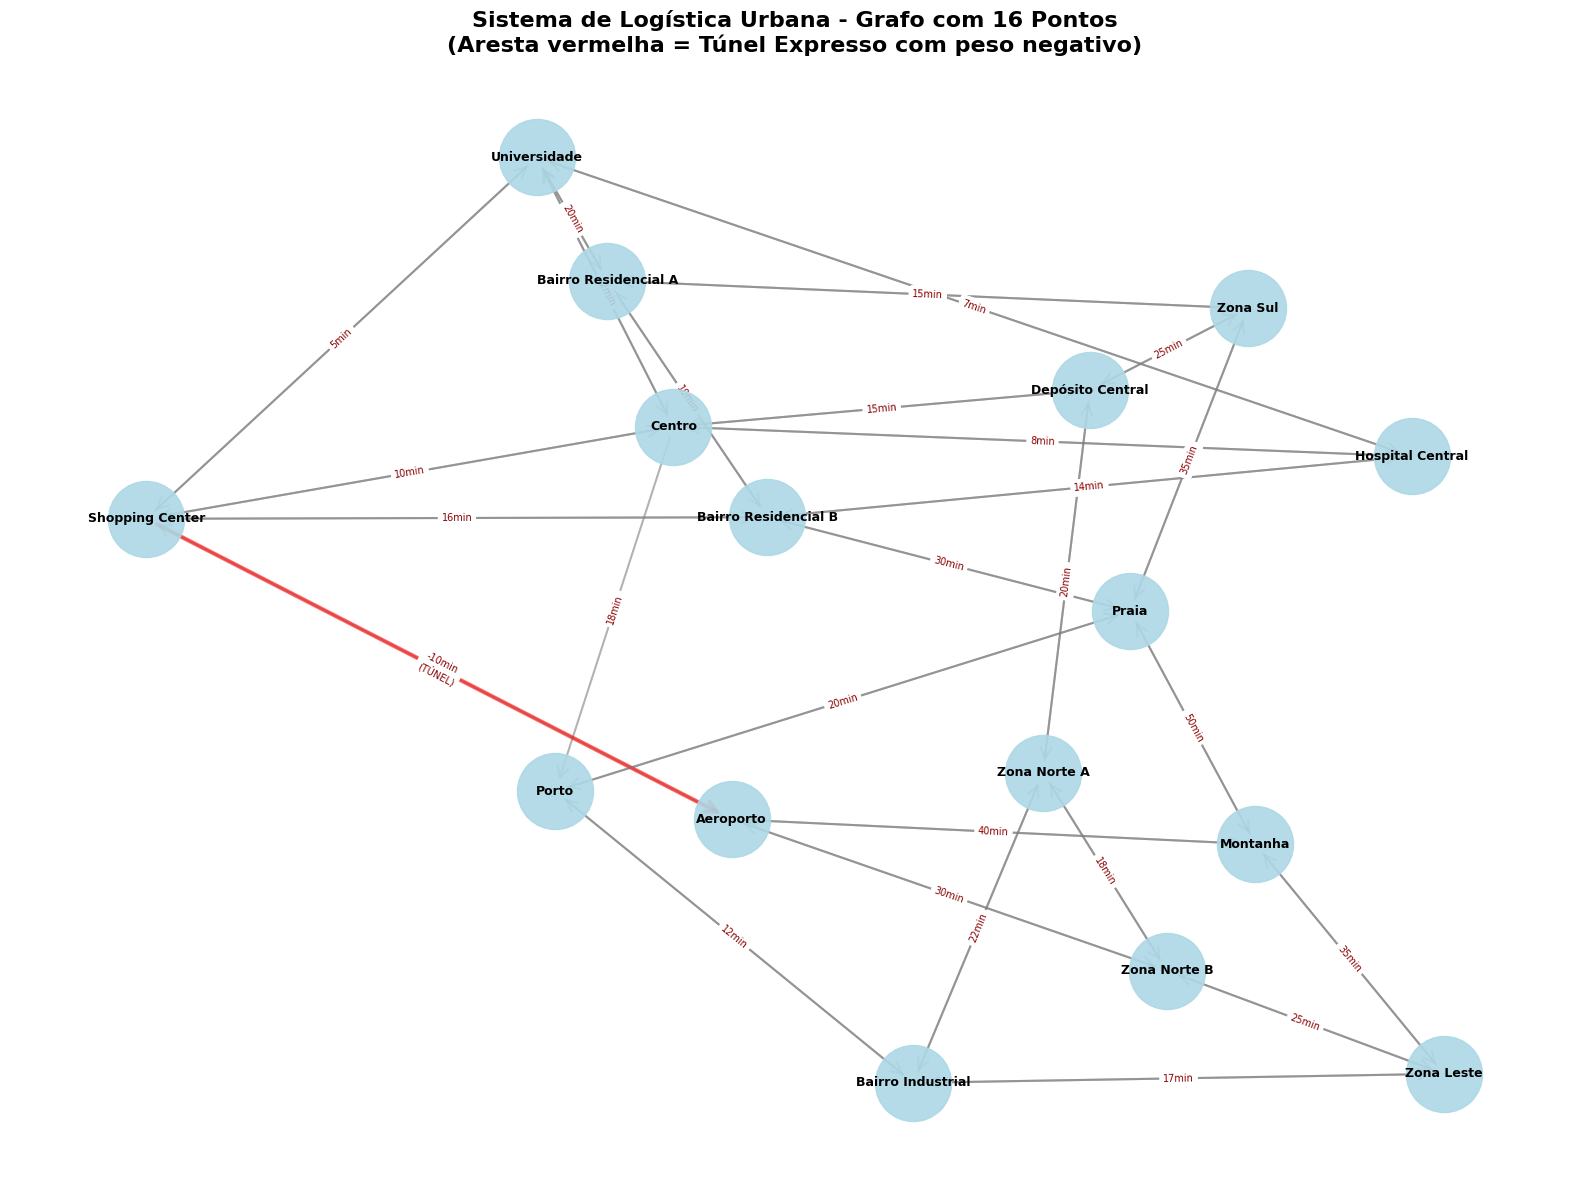


🚇 ATENÇÃO: Aresta com Peso Negativo Detectada!
Origem: Shopping Center (7) → Destino: Aeroporto (6)
Peso: -10 minutos
Interpretação: O Túnel Expresso economiza 10 minutos de viagem
Isso demonstrará a diferença entre Dijkstra e Bellman-Ford!


In [12]:
# Cria uma figura com tamanho específico (largura=16, altura=12 polegadas)
plt.figure(figsize=(16, 12))

# Define o layout (posicionamento) dos nós no gráfico
# spring_layout distribui os nós de forma que minimize as sobreposições
# k controla a distância entre os nós (maior = mais espaçado)
# iterations aumenta a qualidade do layout (mais iterações = melhor disposição)
# seed garante que o layout seja sempre o mesmo (reprodutibilidade)
pos = nx.spring_layout(G, k=2, iterations=50, seed=42)

# Desenha os nós (vértices) do grafo
nx.draw_networkx_nodes(
    G,                          # Grafo a ser desenhado
    pos,                        # Posições dos nós calculadas acima
    node_color='lightblue',     # Cor dos nós
    node_size=3000,             # Tamanho dos nós
    alpha=0.9                   # Transparência (0=invisível, 1=opaco)
)

# Desenha as arestas (conexões) do grafo
# Separamos em dois grupos: arestas normais e aresta negativa
# Primeiro, obtém todas as arestas com seus pesos
edge_colors = []  # Lista para armazenar as cores de cada aresta
edge_widths = []  # Lista para armazenar a espessura de cada aresta

# Itera sobre todas as arestas do grafo
for (u, v) in G.edges():
    peso = G[u][v]['weight']  # Obtém o peso da aresta
    if peso < 0:  # Se o peso é negativo
        edge_colors.append('red')      # Aresta vermelha (destaque)
        edge_widths.append(3)          # Mais grossa
    else:         # Se o peso é positivo
        edge_colors.append('gray')     # Aresta cinza (normal)
        edge_widths.append(1.5)        # Espessura normal

# Desenha as arestas com as cores e espessuras definidas
nx.draw_networkx_edges(
    G,                          # Grafo a ser desenhado
    pos,                        # Posições dos nós
    edge_color=edge_colors,     # Cores das arestas (lista criada acima)
    width=edge_widths,          # Espessuras das arestas
    alpha=0.6,                  # Transparência
    arrows=True,                # Mostra setas (grafo direcionado)
    arrowsize=20,               # Tamanho das setas
    arrowstyle='->'             # Estilo das setas
)

# Cria os rótulos dos nós (nomes dos locais)
# Dicionário que mapeia índice → nome do local
labels = {i: vertices[i] for i in range(len(vertices))}

# Desenha os rótulos dos nós
nx.draw_networkx_labels(
    G,                          # Grafo
    pos,                        # Posições
    labels,                     # Dicionário com os rótulos
    font_size=9,                # Tamanho da fonte
    font_weight='bold',         # Texto em negrito
    font_color='black'          # Cor do texto
)

# Cria os rótulos das arestas (pesos = tempo de viagem)
# Dicionário que mapeia (origem, destino) → peso
edge_labels = {}
for u, v, data in G.edges(data=True):
    peso = data['weight']  # Obtém o peso da aresta
    # Formata o rótulo: coloca minutos e destaca se for negativo
    if peso < 0:
        edge_labels[(u, v)] = f"{peso}min\n(TÚNEL)"  # Destaca o túnel
    else:
        edge_labels[(u, v)] = f"{peso}min"

# Desenha os rótulos das arestas
nx.draw_networkx_edge_labels(
    G,                          # Grafo
    pos,                        # Posições
    edge_labels,                # Dicionário com os rótulos
    font_size=7,                # Tamanho da fonte
    font_color='darkred'        # Cor do texto
)

# Configurações finais do gráfico
plt.title(
    "Sistema de Logística Urbana - Grafo com 16 Pontos\n" +
    "(Aresta vermelha = Túnel Expresso com peso negativo)",
    fontsize=16,
    fontweight='bold'
)
plt.axis('off')  # Remove os eixos (fica mais limpo)
plt.tight_layout()  # Ajusta automaticamente o espaçamento
plt.show()  # Exibe o gráfico

# Informações sobre a aresta negativa
print("\n🚇 ATENÇÃO: Aresta com Peso Negativo Detectada!")
print("=" * 60)
print("Origem: Shopping Center (7) → Destino: Aeroporto (6)")
print("Peso: -10 minutos")
print("Interpretação: O Túnel Expresso economiza 10 minutos de viagem")
print("Isso demonstrará a diferença entre Dijkstra e Bellman-Ford!")
print("=" * 60)

## 🔍 Algoritmos de Busca Cega (Não Informada)

### O que são Buscas Cegas?
Algoritmos de busca cega (ou não informada) **não possuem informação sobre o custo ou distância até o objetivo**. Eles exploram o grafo sistematicamente sem considerar os pesos das arestas.

### 📊 BFS - Busca em Largura (Breadth-First Search)

**Conceito:** Explora o grafo "nível por nível", começando do nó inicial e visitando todos os vizinhos antes de avançar para o próximo nível.

**Aplicação em Logística:**
- Encontra o caminho com **menor número de paradas** (menos estradas)
- Útil quando o número de trocas de rota é mais importante que o tempo total
- Exemplo: Minimizar desgaste do veículo (menos trocas de direção)

**Estrutura de Dados:** Fila (FIFO - First In, First Out)

---

### 🌳 DFS - Busca em Profundidade (Depth-First Search)

**Conceito:** Explora o grafo "em profundidade", seguindo um caminho até o fim antes de retroceder e tentar outros caminhos.

**Aplicação em Logística:**
- Explora uma **região completa** antes de mudar de área
- Útil para mapear todas as rotas possíveis de uma zona
- Pode encontrar caminhos longos mas completos

**Estrutura de Dados:** Pilha (LIFO - Last In, First Out) ou recursão

---

### ⚠️ Limitação Importante
**BFS e DFS NÃO consideram os pesos das arestas!** Eles encontram caminhos baseados apenas na estrutura do grafo, não no tempo de viagem. Para otimização de tempo, usamos Dijkstra ou Bellman-Ford.

## Implementação BFS - Busca em Largura

In [13]:
def busca_largura_bfs(grafo, inicio, fim):
    """
    Busca em Largura (BFS) - Encontra o caminho com menor número de arestas
    
    Parâmetros:
        grafo: Grafo NetworkX
        inicio: Vértice de origem
        fim: Vértice de destino
    
    Retorna:
        Lista com o caminho encontrado ou None se não houver caminho
    """
    
    # Verifica se os vértices de início e fim existem no grafo
    if inicio not in grafo or fim not in grafo:
        return None  # Retorna None se algum vértice não existe
    
    # Cria uma fila (deque) e adiciona o nó inicial
    # A fila armazenará tuplas: (nó_atual, caminho_até_aqui)
    fila = deque([(inicio, [inicio])])
    
    # Conjunto para armazenar os nós já visitados
    # Usamos set() para verificação rápida de pertencimento (O(1))
    visitados = set([inicio])
    
    # Loop principal: continua enquanto houver nós na fila
    while fila:
        # Remove o primeiro elemento da fila (FIFO - First In, First Out)
        # no_atual: o nó que estamos processando agora
        # caminho: lista com o caminho percorrido até chegar aqui
        no_atual, caminho = fila.popleft()
        
        # Verifica se chegamos ao destino
        if no_atual == fim:
            return caminho  # Retorna o caminho completo encontrado
        
        # Explora todos os vizinhos (nós adjacentes) do nó atual
        for vizinho in grafo.neighbors(no_atual):
            # Verifica se o vizinho ainda não foi visitado
            if vizinho not in visitados:
                # Marca o vizinho como visitado
                visitados.add(vizinho)
                
                # Cria um novo caminho adicionando o vizinho ao caminho atual
                # caminho + [vizinho] cria uma nova lista (não modifica a original)
                novo_caminho = caminho + [vizinho]
                
                # Adiciona o vizinho e o novo caminho à fila
                fila.append((vizinho, novo_caminho))
    
    # Se a fila esvaziar e não encontramos o destino, não há caminho
    return None

## ## Implementação DFS - Busca em profundidade

In [14]:
def busca_profundidade_dfs(grafo, inicio):
    """
    Busca em Profundidade (DFS) - Explora o grafo em profundidade
    
    Parâmetros:
        grafo: Grafo NetworkX
        inicio: Vértice de origem
    
    Retorna:
        Lista com a ordem de visitação dos nós
    """
    
    # Verifica se o vértice de início existe no grafo
    if inicio not in grafo:
        return []  # Retorna lista vazia se o vértice não existe
    
    # Conjunto para armazenar os nós já visitados
    visitados = set()
    
    # Lista para armazenar a ordem de visitação dos nós
    ordem_visitacao = []
    
    # Pilha para controlar a ordem de exploração
    # Inicializa com o nó de início
    pilha = [inicio]
    
    # Loop principal: continua enquanto houver nós na pilha
    while pilha:
        # Remove o último elemento da pilha (LIFO - Last In, First Out)
        no_atual = pilha.pop()
        
        # Verifica se o nó já foi visitado
        if no_atual not in visitados:
            # Marca o nó como visitado
            visitados.add(no_atual)
            
            # Adiciona o nó à lista de ordem de visitação
            ordem_visitacao.append(no_atual)
            
            # Adiciona todos os vizinhos não visitados à pilha
            # Usamos reversed() para manter uma ordem consistente
            # (processa vizinhos na ordem inversa, resultando em ordem crescente)
            for vizinho in reversed(list(grafo.neighbors(no_atual))):
                # Só adiciona à pilha se ainda não foi visitado
                if vizinho not in visitados:
                    pilha.append(vizinho)
    
    # Retorna a lista completa com a ordem de visitação
    return ordem_visitacao

## Testes dos algoritmos de busca cega

In [15]:
print("=" * 70)
print("TESTES: ALGORITMOS DE BUSCA CEGA (BFS e DFS)")
print("=" * 70)

# Teste do BFS
print("\n🔵 TESTE BFS - Busca em Largura")
print("-" * 70)
origem_bfs = 0  # Depósito Central
destino_bfs = 14  # Montanha
caminho_bfs = busca_largura_bfs(G, origem_bfs, destino_bfs)

if caminho_bfs:
    print(f"Origem: {vertices[origem_bfs]}")
    print(f"Destino: {vertices[destino_bfs]}")
    print(f"Caminho encontrado (menor número de paradas):")
    # Imprime o caminho com os nomes dos locais
    for i, no in enumerate(caminho_bfs):
        print(f"  {i+1}. {vertices[no]} (vértice {no})")
    print(f"Total de paradas: {len(caminho_bfs)} pontos")
    print(f"Total de estradas: {len(caminho_bfs) - 1} arestas")
else:
    print("Não há caminho entre os pontos especificados.")

# Teste do DFS
print("\n🟢 TESTE DFS - Busca em Profundidade")
print("-" * 70)
origem_dfs = 0  # Depósito Central
ordem_dfs = busca_profundidade_dfs(G, origem_dfs)

print(f"Origem: {vertices[origem_dfs]}")
print(f"Ordem de visitação dos nós (exploração em profundidade):")
for i, no in enumerate(ordem_dfs, 1):
    print(f"  {i:2d}. {vertices[no]} (vértice {no})")
print(f"\nTotal de nós visitados: {len(ordem_dfs)}")

print("\n" + "=" * 70)
print("💡 OBSERVAÇÃO: BFS e DFS não consideram os pesos das arestas!")
print("   Eles encontram caminhos baseados apenas na estrutura do grafo.")
print("=" * 70)

TESTES: ALGORITMOS DE BUSCA CEGA (BFS e DFS)

🔵 TESTE BFS - Busca em Largura
----------------------------------------------------------------------
Origem: Depósito Central
Destino: Montanha
Caminho encontrado (menor número de paradas):
  1. Depósito Central (vértice 0)
  2. Zona Sul (vértice 4)
  3. Praia (vértice 13)
  4. Montanha (vértice 14)
Total de paradas: 4 pontos
Total de estradas: 3 arestas

🟢 TESTE DFS - Busca em Profundidade
----------------------------------------------------------------------
Origem: Depósito Central
Ordem de visitação dos nós (exploração em profundidade):
   1. Depósito Central (vértice 0)
   2. Centro (vértice 1)
   3. Shopping Center (vértice 7)
   4. Universidade (vértice 8)
   5. Hospital Central (vértice 9)
   6. Bairro Residencial B (vértice 12)
   7. Bairro Residencial A (vértice 11)
   8. Zona Sul (vértice 4)
   9. Praia (vértice 13)
  10. Porto (vértice 5)
  11. Bairro Industrial (vértice 10)
  12. Zona Norte A (vértice 2)
  13. Zona Norte B (vé

## ⚡ Algoritmos de Caminho Mínimo

### O que são Algoritmos de Caminho Mínimo?
Algoritmos que **consideram os pesos das arestas** para encontrar o caminho de menor custo total entre dois vértices. No nosso caso, minimizam o **tempo total de viagem**.

---

### 🟦 Algoritmo de Dijkstra

**Criador:** Edsger W. Dijkstra (1956)

**Funcionamento:**
- Utiliza uma **fila de prioridade** (min-heap) para sempre processar o nó mais próximo primeiro
- Mantém uma tabela de distâncias mínimas conhecidas do início até cada nó
- Atualiza as distâncias quando encontra um caminho melhor (relaxamento de arestas)

**Aplicação em Logística:**
- Encontra a **rota mais rápida** entre dois pontos
- Minimiza o tempo total de entrega
- Otimização de combustível e recursos

**Complexidade:** O(E log V) onde E = arestas, V = vértices

**⚠️ LIMITAÇÃO CRÍTICA:** 
- **NÃO funciona com pesos negativos!**
- Assume que, uma vez que um nó é processado, o caminho mínimo até ele já foi encontrado
- Pesos negativos invalidam essa suposição

---

### 🟨 Algoritmo de Bellman-Ford

**Criadores:** Richard Bellman e Lester Ford Jr. (1956-1958)

**Funcionamento:**
- Relaxa **todas as arestas** repetidamente (V-1 vezes)
- Em cada iteração, tenta melhorar todas as distâncias
- Após V-1 iterações, verifica se há **ciclos negativos**

**Aplicação em Logística:**
- Funciona **mesmo com pesos negativos** (como nosso túnel expresso)
- Detecta **ciclos negativos** (rotas que podem ser exploradas infinitamente para ganhar tempo - economicamente impossível)
- Mais versátil que Dijkstra, porém mais lento

**Complexidade:** O(V × E) - mais lento que Dijkstra

**✅ VANTAGEM:** 
- **Aceita pesos negativos!**
- **Detecta ciclos negativos** (retorna erro se existirem)

---

### 🔄 Comparação Dijkstra vs Bellman-Ford

| Característica | Dijkstra | Bellman-Ford |
|----------------|----------|--------------|
| Pesos negativos | ❌ NÃO | ✅ SIM |
| Ciclos negativos | ❌ Não detecta | ✅ Detecta |
| Velocidade | ⚡ Rápido O(E log V) | 🐢 Lento O(V×E) |
| Uso típico | Grafos com pesos positivos | Grafos com pesos negativos |

**No nosso projeto:** Demonstraremos a diferença prática com o **Túnel Expresso** (aresta negativa entre Shopping e Aeroporto)!

## Implementação do algoritmo de Dijkstra

In [16]:
def algoritmo_dijkstra(grafo, inicio, fim):
    """
    Algoritmo de Dijkstra - Encontra o caminho de menor custo
    NÃO funciona com pesos negativos!
    
    Parâmetros:
        grafo: Grafo NetworkX
        inicio: Vértice de origem
        fim: Vértice de destino
    
    Retorna:
        Tupla (caminho, custo_total) ou (None, float('inf')) se não houver caminho
    """
    
    # Verifica se os vértices existem no grafo
    if inicio not in grafo or fim not in grafo:
        return None, float('inf')
    
    # Dicionário para armazenar a menor distância conhecida até cada nó
    # Inicializa todos com infinito, exceto o nó inicial (distância 0)
    distancias = {no: float('inf') for no in grafo.nodes()}
    distancias[inicio] = 0  # Distância do início até ele mesmo é 0
    
    # Dicionário para armazenar o predecessor de cada nó no caminho mínimo
    # Usado para reconstruir o caminho ao final
    predecessores = {no: None for no in grafo.nodes()}
    
    # Fila de prioridade (min-heap)
    # Cada elemento é uma tupla: (distância_acumulada, nó)
    # heapq sempre mantém o elemento de menor distância no topo
    fila_prioridade = [(0, inicio)]  # Inicia com o nó de origem
    
    # Conjunto de nós já processados (visitados definitivamente)
    visitados = set()
    
    # Loop principal: continua enquanto houver nós na fila
    while fila_prioridade:
        # Remove o nó com menor distância acumulada (extração do mínimo)
        # heapq.heappop() remove e retorna o menor elemento em O(log n)
        distancia_atual, no_atual = heapq.heappop(fila_prioridade)
        
        # Se o nó já foi processado, pula para o próximo
        # (podem existir duplicatas na fila com distâncias maiores)
        if no_atual in visitados:
            continue
        
        # Marca o nó como visitado/processado
        visitados.add(no_atual)
        
        # Se chegamos ao destino, podemos parar
        # (Dijkstra garante que esta é a distância mínima)
        if no_atual == fim:
            break
        
        # Explora todos os vizinhos do nó atual (relaxamento de arestas)
        for vizinho in grafo.neighbors(no_atual):
            # Só processa vizinhos ainda não visitados
            if vizinho not in visitados:
                # Obtém o peso da aresta (tempo de viagem)
                peso_aresta = grafo[no_atual][vizinho]['weight']
                
                # Calcula a distância total passando por este caminho
                # distância até o nó atual + peso da aresta até o vizinho
                nova_distancia = distancia_atual + peso_aresta
                
                # Se encontramos um caminho melhor até o vizinho
                if nova_distancia < distancias[vizinho]:
                    # Atualiza a menor distância conhecida
                    distancias[vizinho] = nova_distancia
                    
                    # Atualiza o predecessor (para reconstruir o caminho depois)
                    predecessores[vizinho] = no_atual
                    
                    # Adiciona o vizinho à fila de prioridade
                    # heapq.heappush() insere mantendo a propriedade de heap em O(log n)
                    heapq.heappush(fila_prioridade, (nova_distancia, vizinho))
    
    # ============================================
    # RECONSTRUÇÃO DO CAMINHO
    # ============================================
    
    # Verifica se há caminho até o destino
    if distancias[fim] == float('inf'):
        return None, float('inf')  # Não há caminho
    
    # Reconstrói o caminho do fim ao início usando os predecessores
    caminho = []
    no_atual = fim
    
    # Percorre de trás para frente até chegar ao início
    while no_atual is not None:
        caminho.append(no_atual)  # Adiciona o nó atual ao caminho
        no_atual = predecessores[no_atual]  # Move para o predecessor
    
    # Inverte o caminho (estava de trás para frente)
    caminho.reverse()
    
    # Retorna o caminho e o custo total
    return caminho, distancias[fim]

## Teste do algoritmo de Dijkstra

In [17]:
print("=" * 70)
print("TESTE: ALGORITMO DE DIJKSTRA")
print("=" * 70)

# Define origem e destino
origem = 0  # Depósito Central
destino = 6  # Aeroporto

# Executa o algoritmo de Dijkstra
caminho_dijkstra, custo_dijkstra = algoritmo_dijkstra(G, origem, destino)

# Exibe os resultados
print(f"\n🔵 Origem: {vertices[origem]}")
print(f"🎯 Destino: {vertices[destino]}")
print("-" * 70)

if caminho_dijkstra:
    print(f"✅ Caminho encontrado pelo Dijkstra:")
    # Imprime cada ponto do caminho
    for i, no in enumerate(caminho_dijkstra):
        if i < len(caminho_dijkstra) - 1:
            # Calcula o tempo deste trecho
            tempo_trecho = G[no][caminho_dijkstra[i+1]]['weight']
            print(f"  {i+1}. {vertices[no]} → ({tempo_trecho} min) → ", end="")
        else:
            print(f"{vertices[no]}")
    
    print(f"\n⏱️  Tempo total de viagem: {custo_dijkstra} minutos")
    print(f"📍 Número de paradas: {len(caminho_dijkstra)} pontos")
else:
    print("❌ Não há caminho entre os pontos especificados.")

print("\n" + "=" * 70)
print("⚠️  LEMBRE-SE: Dijkstra NÃO funciona corretamente com pesos negativos!")
print("=" * 70)

TESTE: ALGORITMO DE DIJKSTRA

🔵 Origem: Depósito Central
🎯 Destino: Aeroporto
----------------------------------------------------------------------
✅ Caminho encontrado pelo Dijkstra:
  1. Depósito Central → (15 min) →   2. Centro → (10 min) →   3. Shopping Center → (-10 min) → Aeroporto

⏱️  Tempo total de viagem: 15 minutos
📍 Número de paradas: 4 pontos

⚠️  LEMBRE-SE: Dijkstra NÃO funciona corretamente com pesos negativos!


## Implementação do algoritmo de Bellman-Ford

In [18]:
def algoritmo_bellman_ford(grafo, inicio, fim):
    """
    Algoritmo de Bellman-Ford - Encontra o caminho de menor custo
    FUNCIONA com pesos negativos e detecta ciclos negativos!
    
    Parâmetros:
        grafo: Grafo NetworkX
        inicio: Vértice de origem
        fim: Vértice de destino
    
    Retorna:
        Tupla (caminho, custo_total, tem_ciclo_negativo)
        - caminho: lista com o caminho ou None
        - custo_total: custo do caminho ou float('inf')
        - tem_ciclo_negativo: True se houver ciclo negativo, False caso contrário
    """
    
    # Verifica se os vértices existem no grafo
    if inicio not in grafo or fim not in grafo:
        return None, float('inf'), False
    
    # Obtém a lista de todos os nós do grafo
    nos = list(grafo.nodes())
    
    # Dicionário para armazenar a menor distância conhecida até cada nó
    # Inicializa todos com infinito, exceto o nó inicial (distância 0)
    distancias = {no: float('inf') for no in nos}
    distancias[inicio] = 0  # Distância do início até ele mesmo é 0
    
    # Dicionário para armazenar o predecessor de cada nó no caminho mínimo
    predecessores = {no: None for no in nos}
    
    # ============================================
    # FASE 1: RELAXAMENTO DAS ARESTAS (V-1 vezes)
    # ============================================
    
    # O algoritmo precisa relaxar todas as arestas V-1 vezes
    # onde V é o número de vértices no grafo
    # Isso garante que encontramos o caminho mínimo se não houver ciclo negativo
    
    num_vertices = len(nos)  # Número de vértices
    
    # Loop externo: executa V-1 iterações
    for iteracao in range(num_vertices - 1):
        # Flag para detectar se houve alguma atualização nesta iteração
        # Se uma iteração completa não fizer nenhuma atualização, podemos parar
        houve_atualizacao = False
        
        # Loop interno: percorre todas as arestas do grafo
        for u, v in grafo.edges():
            # Obtém o peso da aresta (tempo de viagem)
            peso = grafo[u][v]['weight']
            
            # Tenta relaxar a aresta (u → v)
            # Verifica se ir de 'inicio' até 'u' e depois até 'v'
            # é melhor do que a melhor distância conhecida até 'v'
            
            # distancias[u] + peso = custo total passando por u até v
            if distancias[u] != float('inf') and distancias[u] + peso < distancias[v]:
                # Encontramos um caminho melhor até v!
                
                # Atualiza a menor distância até v
                distancias[v] = distancias[u] + peso
                
                # Atualiza o predecessor de v (para reconstruir o caminho)
                predecessores[v] = u
                
                # Marca que houve atualização nesta iteração
                houve_atualizacao = True
        
        # Otimização: se nenhuma aresta foi relaxada, já encontramos
        # as distâncias mínimas e podemos parar antes das V-1 iterações
        if not houve_atualizacao:
            break
    
    # ============================================
    # FASE 2: DETECÇÃO DE CICLOS NEGATIVOS
    # ============================================
    
    # Se após V-1 iterações ainda conseguirmos relaxar alguma aresta,
    # significa que existe um CICLO NEGATIVO no grafo
    
    tem_ciclo_negativo = False
    
    # Tenta relaxar todas as arestas mais uma vez
    for u, v in grafo.edges():
        peso = grafo[u][v]['weight']
        
        # Se ainda conseguimos melhorar alguma distância...
        if distancias[u] != float('inf') and distancias[u] + peso < distancias[v]:
            # ... então há um ciclo negativo!
            tem_ciclo_negativo = True
            break  # Não precisa continuar verificando
    
    # Se há ciclo negativo, não há solução válida
    if tem_ciclo_negativo:
        print("\n⚠️  ALERTA: CICLO NEGATIVO DETECTADO!")
        print("    Não é possível determinar o caminho mínimo confiável.")
        print("    Existe um ciclo onde o custo total é negativo,")
        print("    permitindo reduzir o custo indefinidamente.")
        return None, float('inf'), True
    
    # ============================================
    # FASE 3: RECONSTRUÇÃO DO CAMINHO
    # ============================================
    
    # Verifica se há caminho até o destino
    if distancias[fim] == float('inf'):
        return None, float('inf'), False  # Não há caminho
    
    # Reconstrói o caminho do fim ao início usando os predecessores
    caminho = []
    no_atual = fim
    
    # Percorre de trás para frente até chegar ao início
    while no_atual is not None:
        caminho.append(no_atual)  # Adiciona o nó atual ao caminho
        no_atual = predecessores[no_atual]  # Move para o predecessor
    
    # Inverte o caminho (estava de trás para frente)
    caminho.reverse()
    
    # Retorna o caminho, o custo total e se há ciclo negativo (False neste caso)
    return caminho, distancias[fim], False

## Teste do algorimo de Bellman-Ford

In [19]:
print("=" * 70)
print("TESTE: ALGORITMO DE BELLMAN-FORD")
print("=" * 70)

# Define origem e destino
origem = 0  # Depósito Central
destino = 6  # Aeroporto

# Executa o algoritmo de Bellman-Ford
caminho_bellman, custo_bellman, ciclo_negativo = algoritmo_bellman_ford(G, origem, destino)

# Exibe os resultados
print(f"\n🔵 Origem: {vertices[origem]}")
print(f"🎯 Destino: {vertices[destino]}")
print("-" * 70)

if ciclo_negativo:
    print("❌ CICLO NEGATIVO DETECTADO! Não há solução confiável.")
elif caminho_bellman:
    print(f"✅ Caminho encontrado pelo Bellman-Ford:")
    # Imprime cada ponto do caminho
    tempo_acumulado = 0
    for i, no in enumerate(caminho_bellman):
        if i < len(caminho_bellman) - 1:
            # Calcula o tempo deste trecho
            tempo_trecho = G[no][caminho_bellman[i+1]]['weight']
            tempo_acumulado += tempo_trecho
            
            # Destaca se é o túnel expresso (peso negativo)
            if tempo_trecho < 0:
                print(f"  {i+1}. {vertices[no]} → 🚇 ({tempo_trecho} min - TÚNEL EXPRESSO!) → ", end="")
            else:
                print(f"  {i+1}. {vertices[no]} → ({tempo_trecho} min) → ", end="")
        else:
            print(f"{vertices[no]}")
    
    print(f"\n⏱️  Tempo total de viagem: {custo_bellman} minutos")
    print(f"📍 Número de paradas: {len(caminho_bellman)} pontos")
    
    # Verifica se o caminho usa a aresta negativa
    usa_aresta_negativa = False
    for i in range(len(caminho_bellman) - 1):
        if G[caminho_bellman[i]][caminho_bellman[i+1]]['weight'] < 0:
            usa_aresta_negativa = True
            break
    
    if usa_aresta_negativa:
        print("\n✨ Este caminho utiliza o TÚNEL EXPRESSO (aresta negativa)!")
        print("   Bellman-Ford conseguiu aproveitar a economia de tempo!")
else:
    print("❌ Não há caminho entre os pontos especificados.")

print("\n" + "=" * 70)
print("✅ Bellman-Ford FUNCIONA corretamente com pesos negativos!")
print("=" * 70)

TESTE: ALGORITMO DE BELLMAN-FORD

🔵 Origem: Depósito Central
🎯 Destino: Aeroporto
----------------------------------------------------------------------
✅ Caminho encontrado pelo Bellman-Ford:
  1. Depósito Central → (15 min) →   2. Centro → (10 min) →   3. Shopping Center → 🚇 (-10 min - TÚNEL EXPRESSO!) → Aeroporto

⏱️  Tempo total de viagem: 15 minutos
📍 Número de paradas: 4 pontos

✨ Este caminho utiliza o TÚNEL EXPRESSO (aresta negativa)!
   Bellman-Ford conseguiu aproveitar a economia de tempo!

✅ Bellman-Ford FUNCIONA corretamente com pesos negativos!


## 📊 Execução Comparativa e Análise de Resultados

Agora vamos executar todos os algoritmos implementados com o mesmo caso de teste e comparar seus resultados. Isso demonstrará as diferenças práticas entre os algoritmos de busca cega e os algoritmos de caminho mínimo.

### Caso de Teste
- **Origem:** Depósito Central (vértice 0)
- **Destino:** Zona Leste (vértice 15)

### O que esperamos observar:
1. **BFS**: Encontrará o caminho com menos arestas (menos paradas)
2. **DFS**: Mostrará uma exploração em profundidade a partir da origem
3. **Dijkstra**: Encontrará o caminho de menor tempo (se não passar pela aresta negativa)
4. **Bellman-Ford**: Encontrará o caminho de menor tempo (considerando a aresta negativa)

### Execução comparativa de todos os algoritmos

In [20]:
# Define os pontos de origem e destino para o teste
origem_teste = 0   # Depósito Central
destino_teste = 15  # Zona Leste

print("╔" + "═" * 78 + "╗")
print("║" + " " * 20 + "ANÁLISE COMPARATIVA DE ALGORITMOS" + " " * 25 + "║")
print("╚" + "═" * 78 + "╝")
print(f"\n📍 CASO DE TESTE:")
print(f"   Origem: {vertices[origem_teste]} (vértice {origem_teste})")
print(f"   Destino: {vertices[destino_teste]} (vértice {destino_teste})")
print("\n" + "=" * 80 + "\n")

# ============================================
# 1. BUSCA EM LARGURA (BFS)
# ============================================

print("🔵 ALGORITMO 1: BFS - BUSCA EM LARGURA")
print("-" * 80)
print("Objetivo: Encontrar o caminho com MENOR NÚMERO DE ARESTAS")
print("Característica: NÃO considera os pesos das arestas")
print()

# Executa o BFS
caminho_bfs = busca_largura_bfs(G, origem_teste, destino_teste)

if caminho_bfs:
    # Imprime o caminho encontrado
    print("Caminho encontrado:")
    caminho_str = " → ".join([f"{vertices[no]}" for no in caminho_bfs])
    print(f"   {caminho_str}")
    
    # Calcula o tempo total deste caminho
    tempo_total_bfs = 0
    for i in range(len(caminho_bfs) - 1):
        tempo_total_bfs += G[caminho_bfs[i]][caminho_bfs[i+1]]['weight']
    
    print(f"\n📊 Estatísticas:")
    print(f"   • Número de arestas (paradas): {len(caminho_bfs) - 1}")
    print(f"   • Número de pontos visitados: {len(caminho_bfs)}")
    print(f"   • Tempo total de viagem: {tempo_total_bfs} minutos")
else:
    print("❌ Não há caminho disponível.")

print("\n" + "=" * 80 + "\n")

# ============================================
# 2. BUSCA EM PROFUNDIDADE (DFS)
# ============================================

print("🟢 ALGORITMO 2: DFS - BUSCA EM PROFUNDIDADE")
print("-" * 80)
print("Objetivo: Explorar o grafo em profundidade")
print("Característica: NÃO busca caminho específico, mostra ordem de visitação")
print()

# Executa o DFS
ordem_dfs = busca_profundidade_dfs(G, origem_teste)

# Verifica se o destino foi alcançado
if destino_teste in ordem_dfs:
    print(f"✅ O destino foi alcançado na exploração DFS")
    print(f"   Posição na ordem de visitação: {ordem_dfs.index(destino_teste) + 1}º nó visitado")
    print(f"\n   Primeiros 10 nós visitados:")
    for i, no in enumerate(ordem_dfs[:10], 1):
        marcador = "🎯" if no == destino_teste else "  "
        print(f"   {marcador} {i:2d}. {vertices[no]}")
else:
    print("❌ O destino não foi alcançado na exploração.")

print(f"\n📊 Estatísticas:")
print(f"   • Total de nós visitados: {len(ordem_dfs)}")

print("\n" + "=" * 80 + "\n")

# ============================================
# 3. ALGORITMO DE DIJKSTRA
# ============================================

print("🟦 ALGORITMO 3: DIJKSTRA - CAMINHO MÍNIMO")
print("-" * 80)
print("Objetivo: Encontrar o caminho de MENOR TEMPO TOTAL")
print("Característica: CONSIDERA os pesos, mas NÃO funciona com pesos negativos")
print()

# Executa o Dijkstra
caminho_dijkstra, custo_dijkstra = algoritmo_dijkstra(G, origem_teste, destino_teste)

if caminho_dijkstra:
    # Imprime o caminho encontrado
    print("Caminho encontrado:")
    caminho_str = " → ".join([f"{vertices[no]}" for no in caminho_dijkstra])
    print(f"   {caminho_str}")
    
    # Mostra detalhes do caminho
    print("\n   Detalhamento dos trechos:")
    for i in range(len(caminho_dijkstra) - 1):
        origem_trecho = caminho_dijkstra[i]
        destino_trecho = caminho_dijkstra[i + 1]
        tempo_trecho = G[origem_trecho][destino_trecho]['weight']
        print(f"     {vertices[origem_trecho]:20s} → {vertices[destino_trecho]:20s} : {tempo_trecho:3d} min")
    
    print(f"\n📊 Estatísticas:")
    print(f"   • Número de arestas (paradas): {len(caminho_dijkstra) - 1}")
    print(f"   • Número de pontos visitados: {len(caminho_dijkstra)}")
    print(f"   • Tempo total de viagem: {custo_dijkstra} minutos ⏱️")
else:
    print("❌ Não há caminho disponível.")

print("\n" + "=" * 80 + "\n")

# ============================================
# 4. ALGORITMO DE BELLMAN-FORD
# ============================================

print("🟨 ALGORITMO 4: BELLMAN-FORD - CAMINHO MÍNIMO (COM PESOS NEGATIVOS)")
print("-" * 80)
print("Objetivo: Encontrar o caminho de MENOR TEMPO TOTAL")
print("Característica: CONSIDERA os pesos E funciona com pesos negativos")
print()

# Executa o Bellman-Ford
caminho_bellman, custo_bellman, ciclo_negativo = algoritmo_bellman_ford(G, origem_teste, destino_teste)

if ciclo_negativo:
    print("❌ CICLO NEGATIVO DETECTADO! Não há solução confiável.")
elif caminho_bellman:
    # Imprime o caminho encontrado
    print("Caminho encontrado:")
    caminho_str = " → ".join([f"{vertices[no]}" for no in caminho_bellman])
    print(f"   {caminho_str}")
    
    # Mostra detalhes do caminho (destacando arestas negativas)
    print("\n   Detalhamento dos trechos:")
    usa_aresta_negativa = False
    for i in range(len(caminho_bellman) - 1):
        origem_trecho = caminho_bellman[i]
        destino_trecho = caminho_bellman[i + 1]
        tempo_trecho = G[origem_trecho][destino_trecho]['weight']
        
        if tempo_trecho < 0:
            print(f"   🚇 {vertices[origem_trecho]:20s} → {vertices[destino_trecho]:20s} : {tempo_trecho:3d} min (TÚNEL!)")
            usa_aresta_negativa = True
        else:
            print(f"     {vertices[origem_trecho]:20s} → {vertices[destino_trecho]:20s} : {tempo_trecho:3d} min")
    
    print(f"\n📊 Estatísticas:")
    print(f"   • Número de arestas (paradas): {len(caminho_bellman) - 1}")
    print(f"   • Número de pontos visitados: {len(caminho_bellman)}")
    print(f"   • Tempo total de viagem: {custo_bellman} minutos ⏱️")
    
    if usa_aresta_negativa:
        print(f"\n   ✨ Este caminho utiliza o TÚNEL EXPRESSO!")
else:
    print("❌ Não há caminho disponível.")

print("\n" + "=" * 80 + "\n")

# ============================================
# COMPARAÇÃO FINAL DOS RESULTADOS
# ============================================

print("╔" + "═" * 78 + "╗")
print("║" + " " * 30 + "COMPARAÇÃO FINAL" + " " * 32 + "║")
print("╚" + "═" * 78 + "╝")
print()

# Tabela comparativa
print("┌" + "─" * 20 + "┬" + "─" * 15 + "┬" + "─" * 20 + "┬" + "─" * 20 + "┐")
print("│ Algoritmo          │ Tempo (min)   │ Nº de Arestas      │ Considera Pesos    │")
print("├" + "─" * 20 + "┼" + "─" * 15 + "┼" + "─" * 20 + "┼" + "─" * 20 + "┤")

# BFS
if caminho_bfs:
    tempo_bfs_str = f"{tempo_total_bfs}"
    arestas_bfs_str = f"{len(caminho_bfs) - 1}"
else:
    tempo_bfs_str = "N/A"
    arestas_bfs_str = "N/A"
print(f"│ BFS                │ {tempo_bfs_str:13s} │ {arestas_bfs_str:18s} │ {'NÃO':18s} │")

# DFS (não busca caminho específico)
print(f"│ DFS                │ {'N/A':13s} │ {'(exploração)':18s} │ {'NÃO':18s} │")

# Dijkstra
if caminho_dijkstra:
    dijkstra_tempo_str = f"{custo_dijkstra}"
    dijkstra_arestas_str = f"{len(caminho_dijkstra) - 1}"
else:
    dijkstra_tempo_str = "N/A"
    dijkstra_arestas_str = "N/A"
print(f"│ Dijkstra           │ {dijkstra_tempo_str:13s} │ {dijkstra_arestas_str:18s} │ {'SIM (sem neg)':18s} │")

# Bellman-Ford
if caminho_bellman and not ciclo_negativo:
    bellman_tempo_str = f"{custo_bellman}"
    bellman_arestas_str = f"{len(caminho_bellman) - 1}"
else:
    bellman_tempo_str = "N/A"
    bellman_arestas_str = "N/A"
print(f"│ Bellman-Ford       │ {bellman_tempo_str:13s} │ {bellman_arestas_str:18s} │ {'SIM (com neg)':18s} │")

print("└" + "─" * 20 + "┴" + "─" * 15 + "┴" + "─" * 20 + "┴" + "─" * 20 + "┘")

# Análise final
print("\n💡 ANÁLISE DOS RESULTADOS:\n")

print("1️⃣  BFS vs Algoritmos de Caminho Mínimo:")
if caminho_bfs and caminho_dijkstra:
    if len(caminho_bfs) < len(caminho_dijkstra):
        print(f"   • BFS encontrou um caminho com MENOS arestas ({len(caminho_bfs)-1} vs {len(caminho_dijkstra)-1})")
        print(f"   • Porém, o tempo total do BFS ({tempo_total_bfs} min) pode ser maior")
    elif len(caminho_bfs) == len(caminho_dijkstra):
        print(f"   • BFS e Dijkstra encontraram caminhos com o mesmo número de arestas")
    else:
        print(f"   • Dijkstra otimiza o TEMPO, não o número de arestas")

print("\n2️⃣  Dijkstra vs Bellman-Ford:")
if caminho_dijkstra and caminho_bellman and not ciclo_negativo:
    if custo_dijkstra == custo_bellman:
        print(f"   • Ambos encontraram o mesmo tempo total: {custo_dijkstra} minutos")
        if caminho_dijkstra == caminho_bellman:
            print(f"   • Os caminhos são IDÊNTICOS")
        else:
            print(f"   • Os caminhos são DIFERENTES, mas com o mesmo custo")
    elif custo_bellman < custo_dijkstra:
        print(f"   • Bellman-Ford encontrou um caminho MAIS RÁPIDO!")
        print(f"   • Dijkstra: {custo_dijkstra} min vs Bellman-Ford: {custo_bellman} min")
        print(f"   • Diferença: {custo_dijkstra - custo_bellman} minutos economizados")
        print(f"   • Isto ocorre porque Bellman-Ford pode usar arestas negativas!")
    else:
        print(f"   • Ambos encontraram caminhos ótimos (tempos similares)")

print("\n3️⃣  Conclusões:")
print("   • BFS/DFS são úteis para exploração estrutural do grafo")
print("   • Dijkstra é eficiente para grafos com pesos positivos")
print("   • Bellman-Ford é necessário quando há pesos negativos")
print("   • A escolha do algoritmo depende das características do problema!")

print("\n" + "=" * 80)

╔══════════════════════════════════════════════════════════════════════════════╗
║                    ANÁLISE COMPARATIVA DE ALGORITMOS                         ║
╚══════════════════════════════════════════════════════════════════════════════╝

📍 CASO DE TESTE:
   Origem: Depósito Central (vértice 0)
   Destino: Zona Leste (vértice 15)


🔵 ALGORITMO 1: BFS - BUSCA EM LARGURA
--------------------------------------------------------------------------------
Objetivo: Encontrar o caminho com MENOR NÚMERO DE ARESTAS
Característica: NÃO considera os pesos das arestas

Caminho encontrado:
   Depósito Central → Zona Norte A → Zona Norte B → Zona Leste

📊 Estatísticas:
   • Número de arestas (paradas): 3
   • Número de pontos visitados: 4
   • Tempo total de viagem: 63 minutos


🟢 ALGORITMO 2: DFS - BUSCA EM PROFUNDIDADE
--------------------------------------------------------------------------------
Objetivo: Explorar o grafo em profundidade
Característica: NÃO busca caminho específico, mostra 